In [207]:
import pandas as pd
import operator as op
from functools import reduce
import seaborn as sns
sns.set()

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def P(x, n, p):
    return ncr(n, x) * (p**x) * ((1-p)**(n-x))

# 1.You flip a fair coin 10 times. What is the probability of getting 8 or more heads? 

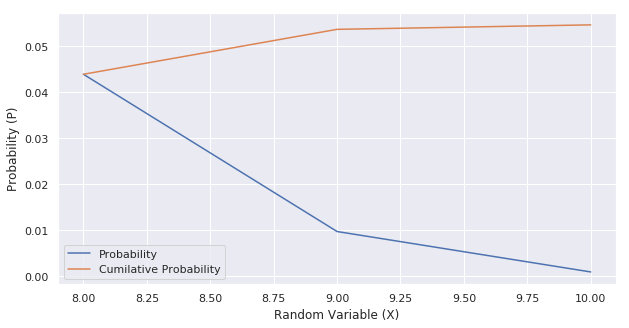

mean:  0.4


In [208]:
p = []

n = 10
sum_p = 0
for i in range(8, n+1):
    prob = P(x=i, n=n, p=0.5)
    sum_p += prob
    p.append([i, prob, sum_p])
     
    
Experiment = pd.DataFrame(p, columns=["X", "P", "CU_P"])
    
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 5))
sns.lineplot(x="X", y="P", data=Experiment, label='Probability')
sns.lineplot(x="X", y="CU_P", data=Experiment, label='Cumilative Probability')
plt.xlabel('Random Variable (X)')
plt.ylabel('Probability (P)')
plt.legend()
plt.show()

print("mean: ", round(sum(Experiment["P"] * Experiment["X"]), 1))

# 2. The probability that you will win a certain game is 0.3. You play the game 20 times. What is the mean of this binomial distribution?


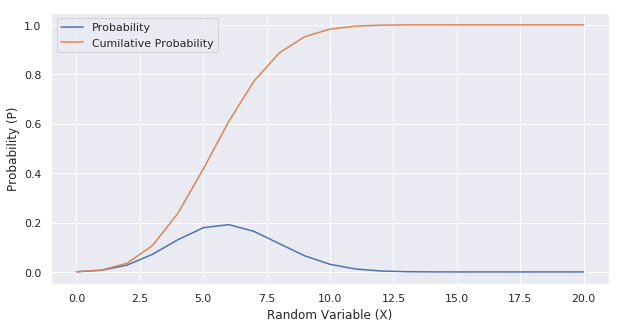

mean:  6.0
dist mean:  6.0


In [209]:

p = []

n = 20
sum_p = 0
for i in range(0, n+1):
    prob = P(x=i, n=n, p=0.3)
    sum_p += prob
    p.append([i, prob, sum_p])
     
    
Experiment = pd.DataFrame(p, columns=["X", "P", "CU_P"])
    

plt.figure(figsize=(10, 5))
sns.lineplot(x="X", y="P", data=Experiment, label='Probability')
sns.lineplot(x="X", y="CU_P", data=Experiment, label='Cumilative Probability')
plt.xlabel('Random Variable (X)')
plt.ylabel('Probability (P)')
plt.legend()
plt.show()

print("mean: ", round(sum(Experiment["P"] * Experiment["X"]), 1))
print("dist mean: ", n*0.3)


# 3. An automatic camera records the number of cars running a red light at an intersection (that is, the cars were going through when the red light was against the car). Analysis of the data shows that on average 15% of light changes record a car running a red light. Assume that the data has a binomial distribution. What is theprobability that in 20 light changes there will be exactly three (3) cars running a red light?

In [210]:
print("X: 3  P:", round(P(3, 20, 0.15), 3))
print("{}% of the time the red light is crossed by 3 cars in 20 light changes".format(round(P(3, 20, 0.15), 3)*100))

X: 3  P: 0.243
24.3% of the time the red light is crossed by 3 cars in 20 light changes


# 4. There are 15 sets of traffic lights on the journey.The probability that a driver must stop at any one traffic light coming to alliance University is 0.3  

a) What is the probability that a student must stop at exactly 2 of the 15 sets oftraffic lights? 

b) What is the probability that a student will be stopped at 1 or more of the 15sets of traffic lights? 

In [211]:
print("a) X: 2  P:", round(P(2, 15, 0.3), 3))
print("b) X: 1-15  P:", round((1 - P(0, 15, 0.3)), 10))

a) X: 2  P: 0.092
b) X: 1-15  P: 0.9952524385


# 5. What is the area under the curve of a probability distribution? Explain.

# 6. My Bank has a large Credit Card portfolio. Based on empirical data, they have found that 60% of the customers pay their bill on time. If a sample of 10 accounts is selected from the current database, construct the Probability Distribution of accounts paying on time.
Hint: Make use of Function used in Excel or R

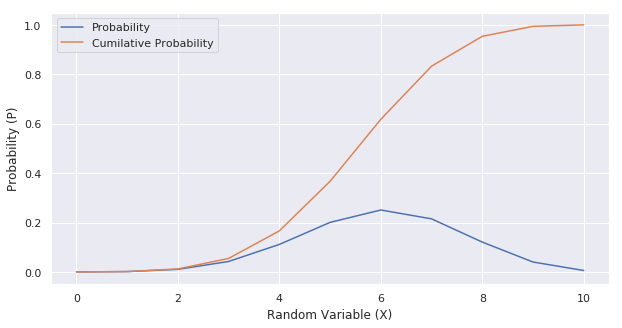

mean:  6.0
dist mean:  6.0


In [212]:
p = []

n = 10
sum_p = 0
for i in range(0, n+1):
    prob = P(x=i, n=n, p=0.6)
    sum_p += prob
    p.append([i, prob, sum_p])
     
    
Experiment = pd.DataFrame(p, columns=["X", "P", "CU_P"])
    

plt.figure(figsize=(10, 5))
sns.lineplot(x="X", y="P", markers=True, dashes=False, data=Experiment, label='Probability')
sns.lineplot(x="X", y="CU_P", markers=True, dashes=False, data=Experiment, label='Cumilative Probability')
plt.xlabel('Random Variable (X)')
plt.ylabel('Probability (P)')
plt.legend()
plt.show()

print("mean: ", round(sum(Experiment["P"] * Experiment["X"]), 1))
print("dist mean: ", n*0.6)

# 7. If the likelihood of a tagged order form is 0.1, What is the probability that there are three tagged order forms in the sample of four?
Hint: Use Binomial distribution equation

In [108]:
print("X: 2  P:", round(P(3, 4, 0.1), 5))

X: 2  P: 0.0036


# 8. Determine the following:
a) For n = 4 and Mu = 0.12, what is P(X = 0)?

b) For n = 6 and Mu = 0.83, what is P(X = 5)?

In [115]:
u = 0.12
n = 4
p = 0.12
print("a) X: 0  P:", round(P(0, n, p), 3))

u = 0.83
n = 6
p = u/n
print("b) X: 5  P:", round(P(0, n, p), 3))

a) X: 0  P: 0.6
b) X: 5  P: 0.409


# 9.Determine the mean and standard deviation of the variable X in each of the following binomial distributions:
a) n = 4 and Mu = 0.10

b) n = 5 and Mu = 0.80

In [112]:
n = 4
mean = 0.10
p = mean/n
stdev = (mean * (1-p))**(-0.5)
print("mean: {}, stdev: {}".format(mean, stdev))

n = 5
mean = 0.80
p = mean/n
stdev = (mean * (1-p))**(-0.5)
print("mean: {}, stdev: {}".format(mean, stdev))

mean: 0.1, stdev: 3.2025630761017427
mean: 0.8, stdev: 1.2198750911856664


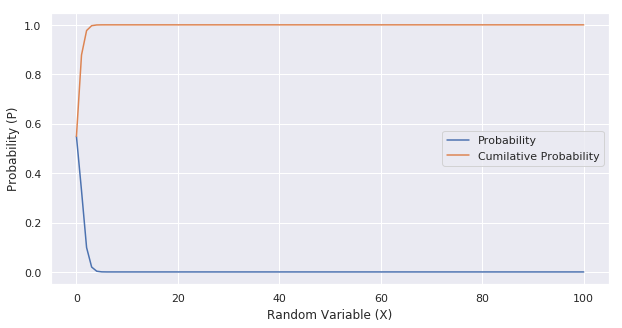

In [205]:
def P(k, lamda):
    """Poission Distrubution"""
    from math import e
    denom = reduce(op.mul, range(1, k+1), 1)
    return ((lamda**k) * (e**(-lamda)))/ denom 
    

p = []

sum_p = 0

lamda = 0.6
k = 100
for i in range(0, k+1):
    prob = P(i, lamda)
    sum_p += prob
    p.append([i, prob, sum_p])
     
    
Experiment = pd.DataFrame(p, columns=["X", "P", "CU_P"])
    

plt.figure(figsize=(10, 5))
sns.lineplot(x="X", y="P", markers=True, dashes=False, data=Experiment, label='Probability')
sns.lineplot(x="X", y="CU_P", markers=True,data=Experiment, label='Cumilative Probability')
plt.xlabel('Random Variable (X)')
plt.ylabel('Probability (P)')
plt.legend()
plt.show()



# 10. Assume a poisson distribution with lambda = 5.0. What is the probability that
a) X <= 1?

b) X > 1?

In [129]:
print(P(1, 5))
print(1-P(1, 5))

0.033689734995427344
0.9663102650045726


# 11. The number of work related injuries per month in a manufacturing plant is known to follow a Poisson distribution, with a mean of 2.5 work-related injuries a month.

a) What is the probability that in a given month, no work-related injuries occur?

b) That at least one work- related injury occurs?

Hint: Use Poisson distribution equation, find X = 0, Given lambda = 2.5

In [131]:
print(P(0, 2.5))
print(1 - P(0, 2.5))

0.0820849986238988
0.9179150013761012


# 12. A 5-litre bucket of water is taken from a swamp. The water contains 75 mosquito larvae. A 200mL flask of water is taken form the bucket for further analysis. What is

a) the expected number of larvae in the flask?

b) the probability that the flask contains at least one mosquito lava?

In [142]:
print((200 * 75)/5000)
print(1- P(0, 3))

3.0
0.950212931632136


# 13. Why the need of Standardization? Why do we us Z instead of “the Number of Standard Deviations”?

# 14. A radar unit is used to measure speeds of cars on a Mumbai – Pune Highway. The speeds are normally distributed with a mean of 70 km/hr and a standard deviation of 10 km/hr.

a)What is the probability that a car picked at random is travelling at more than 100 km/hr?

b)What is the probability that the car speed is between 80 Km / hr and 100 Km / hr

Hint: You can make use of Excel

In [164]:
from scipy.stats import norm, binom

print("above 100", 1- norm(70, 10).cdf(100))
print("between 80 and 100",  norm(70, 10).cdf(100) - norm(70, 10).cdf(80))

above 100 0.0013498980316301035
between 80 and 100 0.15730535589982697


# Binomial distribution

It is widely used probability distribution of a discrete random variable.

Plays major role in quality control and quality assurance function.

P(X=x∣n,π)P(X=x∣n,π) = n!x!(n−x)!πx(1−π)n−xn!x!(n−x)!πx(1−π)n−x
where P(X = x) is the probability of getting x successes in n trials and ππ is the probability of an event of interest

Some important functions in Python for Binomial distribution:
1) Probability mass function
scipy.stats.binom.pmf gives the probability mass function for the binomial distribution
binomial = scipy.stats.binom.pmf (k,n,p),

where k is an array and takes values in {0, 1,..., n}
n and p are shape parameters for the binomial distribution
The output, binomial, gives probability of binomial distribution function in terms of array.

2) Cumulative Density function
cumbinomial = scipy.stats.binom.cdf(k,n,p) gives cumulative binomial distribution.

The output, cumbinomial, gives cumulative probability of binomial distribution function in terms of array.

3) Plot the binomial Density function
The function, matplotlib.pyplot.plot(k, binomial, ‘o-’) gives us plot of the binomial distribution function.

# 15. The percentage of orders filled correctly at Wendy's was approximately 86.8%. Suppose that you go to drive-through window at Wendy's and place an order. Two friends of yours independently place orders at the drive-through window at the same Wendy's.

What are the probabilities that

a) all three

b) none of the three

c) atleast two of the three orders will be filled correctly?

d) what is the mean and standard deviation of the orders filled correctly?

In [193]:
p   =  0.868 # percentage of orders filled correctly at Wendy's was approximately 86.8%
n   =  4
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
k = range(0, 4, 1)

In [194]:
from scipy.stats import binom
import matplotlib.pyplot as plt
binomial = binom.pmf(k,n,p)

In [195]:
binomial[3]

0.34529723289600006

In [196]:
binomial[0]

0.00030359577599999997

In [197]:
cumbinomial = binom.cdf(k, n, p)

In [198]:
1- cumbinomial[1]

0.991710915328

In [199]:
mean = n*p
std = sqrt(n * p * (1-p))

In [200]:
print(mean, std)

3.472 0.6769815359372809


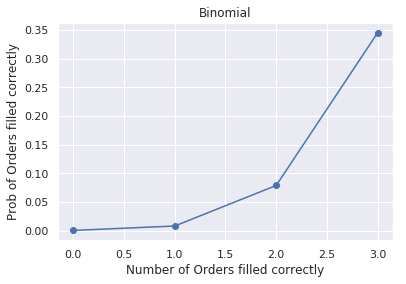

In [201]:
plt.plot(k,binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of Orders filled correctly')
plt.ylabel('Prob of Orders filled correctly')
plt.show()